# Time Series Analysis, Forecasting, and Machine Learning
By Lazy Programmer on Udemy
## Section 4: Exponential Smoothing and ETS (Error, Trend, Seasonal) Methods

**Lesson# 20**  
* SMA: Simple Moving Average  
* EWMA: Exponentially Weighted Moving Average  
* 3 forecsating models  
  -- Simple Exponential Smoothing (SES): Non-trending, non-seasonal  
  -- Holt model: Trending, but non-seasonal  
  -- Holt-Winters model: Trend, seasonal  

**Lesson# 21**
* ETS (Error, Trend, Seasonal) for beginners  
  -- SMA  
  -- EWMA  
* Simple Exponential Smoothing (SES): SES turns EWMA into a forecasting model  
  -- Level(t + h) = EWMA(Time series from 1....t)  
* Holt Linear Trend Model:  
  -- Level(t + h) = EWMA(Level of time series from 1....t)  
  -- Trend(t + h) = EWMA(Trend of time series from 1....t)  
* Holt-Winters model:  
  -- Level(t + h) = EWMA(Level of time series from 1....t)  
  -- Trend(t + h) = EWMA(Trend of time series from 1....t)  
  -- Seasonal(t + h) = EWMA(Seasonal time series from 1....t)  

* Different ways to combine:  
  -- Output = Level + Trend + Seasonality
  -- Output = Level x Trend x Seasonality
  -- Output = (Level + Trend) x Seasonality
  -- And more ...

**Lesson# 22**  
* Simple Moving Average (SMA)  
* Why use SMA?  

In [1]:
# Lesson# 23
# SMA

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
close = pd.read_csv('sp500_close.csv', index_col = 0, parse_dates = True)
close.head(3)

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,14.75,67.8542,78.9,36.25,46.89,34.41,73.31,39.12,45.7,30.22,...,37.51,28.24,88.61,42.87,31.84,27.09,65.3,75.85,24.14,33.05
2013-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2013-02-08 to 2018-02-07
Columns: 505 entries, AAL to ZTS
dtypes: float64(505)
memory usage: 7.0 MB


In [4]:
goog = close[['GOOG']].copy().dropna()

In [5]:
goog.head()

,GOOG
2014-03-27,558.46
2014-03-28,559.99
2014-03-31,556.97
2014-04-01,567.16
2014-04-02,567.00


<AxesSubplot:>

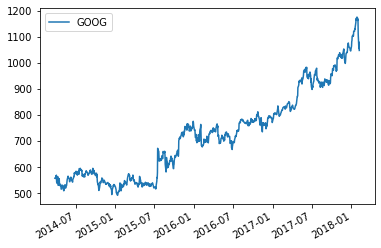

In [6]:
goog.plot()

In [7]:
# Log return by calling % change function, add 1 and take log
goog_ret = np.log(goog.pct_change(1) + 1)

<AxesSubplot:>

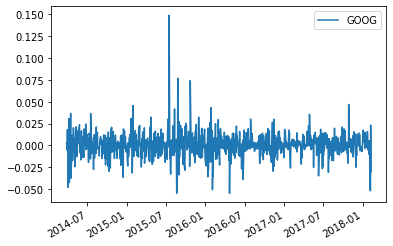

In [8]:
goog_ret.plot()

In [9]:
goog['SMA-10'] = goog['GOOG'].rolling(10).mean()
goog.head(15)

,GOOG,SMA-10
2014-03-27,558.46,NaN
2014-03-28,559.99,NaN
2014-03-31,556.97,NaN
2014-04-01,567.16,NaN
2014-04-02,567.00,NaN
2014-04-03,569.74,NaN
2014-04-04,543.14,NaN
2014-04-07,538.15,NaN
2014-04-08,554.90,NaN
2014-04-09,564.14,557.965


In [10]:
type(goog['GOOG'].rolling(10))

pandas.core.window.rolling.Rolling

<AxesSubplot:>

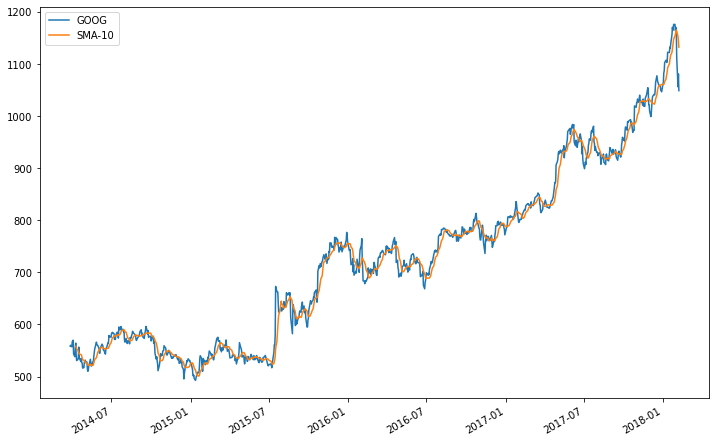

In [11]:
goog.plot(figsize = (12,8))

<AxesSubplot:>

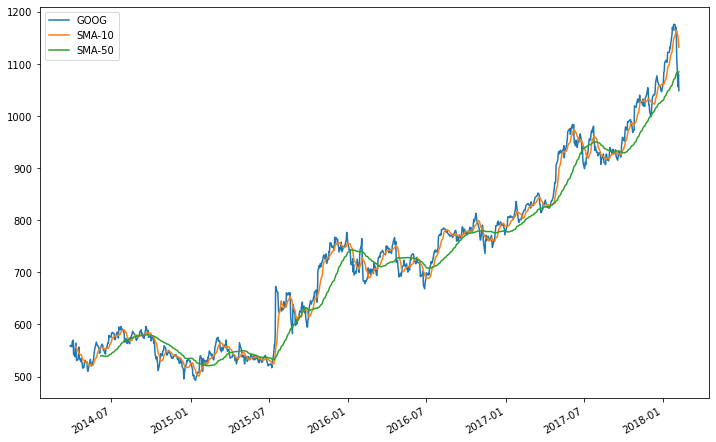

In [12]:
goog['SMA-50'] = goog['GOOG'].rolling(50).mean()
goog.plot(figsize = (12, 8))

In [13]:
goog_aapl = close[['GOOG','AAPL']].copy().dropna()
cov = goog_aapl.rolling(50).cov()
cov

GOOG       AAPL
2014-03-27 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-28 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-31 GOOG          NaN        NaN
...                      ...        ...
2018-02-05 AAPL    34.825709  17.568865
2018-02-06 GOOG  2691.756465  38.174468
           AAPL    38.174468  19.121371
2018-02-07 GOOG  2678.778214  49.980378
           AAPL    49.980378  22.052882

[1950 rows x 2 columns]

In [14]:
# Select a single row by date and convert it to a Numpy array
cov.loc['2018-02-07'].to_numpy()

array([[2678.77821424,   49.98037849],
       [  49.98037849,   22.05288249]])

In [16]:
# calculating log return
goog_aapl_ret = np.log(goog_aapl.pct_change(1) + 1)
goog_aapl_ret.head()

,GOOG,AAPL
2014-03-27,NaN,NaN
2014-03-28,0.002736,-0.001117
2014-03-31,-0.005408,-0.000223
2014-04-01,0.018130,0.009106
2014-04-02,-0.000282,0.001661


In [17]:
goog_aapl_ret['GOOG-SMA-50'] = goog_aapl_ret['GOOG'].rolling(50).mean()
goog_aapl_ret['AAPL-SMA-50'] = goog_aapl_ret['AAPL'].rolling(50).mean()

<AxesSubplot:>

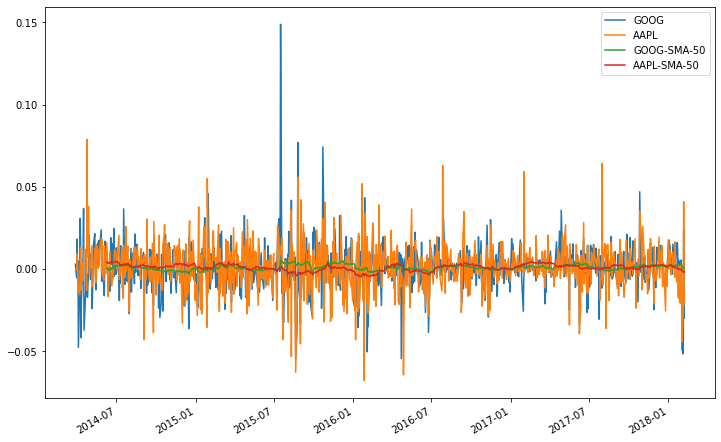

In [18]:
goog_aapl_ret.plot(figsize = (12, 8))

In [19]:
cov = goog_aapl_ret[['GOOG','AAPL']].rolling(50).cov()
cov.tail()

GOOG      AAPL
2018-02-05 AAPL  0.000110  0.000143
2018-02-06 GOOG  0.000193  0.000129
           AAPL  0.000129  0.000177
2018-02-07 GOOG  0.000212  0.000142
           AAPL  0.000142  0.000185

In [22]:
# Rolling correlation of the log return
corr = goog_aapl_ret[['GOOG-SMA-50','AAPL-SMA-50']].rolling(50).corr()
corr.tail(16)

GOOG-SMA-50  AAPL-SMA-50
2018-01-29 GOOG-SMA-50     1.000000    -0.353417
           AAPL-SMA-50    -0.353417     1.000000
2018-01-30 GOOG-SMA-50     1.000000    -0.397767
           AAPL-SMA-50    -0.397767     1.000000
2018-01-31 GOOG-SMA-50     1.000000    -0.426551
           AAPL-SMA-50    -0.426551     1.000000
2018-02-01 GOOG-SMA-50     1.000000    -0.462629
           AAPL-SMA-50    -0.462629     1.000000
2018-02-02 GOOG-SMA-50     1.000000    -0.406629
           AAPL-SMA-50    -0.406629     1.000000
2018-02-05 GOOG-SMA-50     1.000000    -0.138433
           AAPL-SMA-50    -0.138433     1.000000
2018-02-06 GOOG-SMA-50     1.000000    -0.030574
           AAPL-SMA-50    -0.030574     1.000000
2018-02-07 GOOG-SMA-50     1.000000     0.114578
           AAPL-SMA-50     0.114578     1.000000

**Lesson# 24:** EWMA Theory  
* Exponentially-Weighted Moving Average (EWMA)  
  -- Also know as Exponential Smoothing  
  -- A kind of low-pass filter  
  -- Applicable in ML, Statistics, Finance, Signal processing
* Further study: https://www.youtube.com/watch?v=lAq96T8FkTw  
* Further study: https://www.youtube.com/watch?v=NxTFlzBjS-4

$Arithmetic \ mean: \bar{x} = \frac{1}{T} \sum \limits _{t=1} ^{T} {x}_{t}$  
<br>
$EWMA: \bar{x}_{t} = {\alpha}{x}_{t} + (1 - {\alpha})\bar{x}_{t-1}, where \ 0 \le {\alpha} \le 1$  
<br>
$xhat = df['GOOG'].ewm(alpha).mean()$ # also var, cov, etc.

* Choosing Alpha:  
  -- Alpha is something like a decay factor  
  -- Alpha is a small value between 0 & 1, e.g. 0.1, 0.2, ...  
    -- Alpha = 1: we just copy the original time series  
    -- Alpha = 0: we just copy itself  
    -- Alpha = almost 1: follow new samples more (new samples matter much more, old samples matter less)  
      -- this leads to much more noisy time series, would more closely match to the original  
    -- Alpha = almost 0: new samples matter much less, old average carries much more weight  
      -- this leads to much smoother time series  

Why can't we use the following formula?  
$Arithmetic \ mean \ (up \ to \ time \ t): \bar{x}_{t} = \frac{1}{t} \sum \limits _{\tau=1} ^{t} {x}_{\tau}$  

**Lesson# 25:** EWMA code

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('airline_passengers.csv', index_col = 'Month', parse_dates = True)
df.head(3)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


In [5]:
df.isna().sum()

Passengers    0
dtype: int64

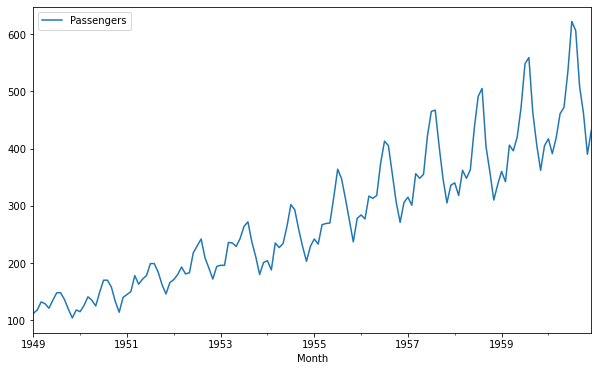

In [11]:
df.plot(figsize = (10, 6))
plt.show()

In [25]:
# Setting alpha
alpha = 0.2 # no perticular reason to shoose 0.2, a hyper parameter that can be optimized

In [26]:
df['EWMA'] = df['Passengers'].ewm(alpha=alpha, adjust = False).mean()

In [27]:
type(df['Passengers'].ewm(alpha=alpha, adjust = False))

pandas.core.window.ewm.ExponentialMovingWindow

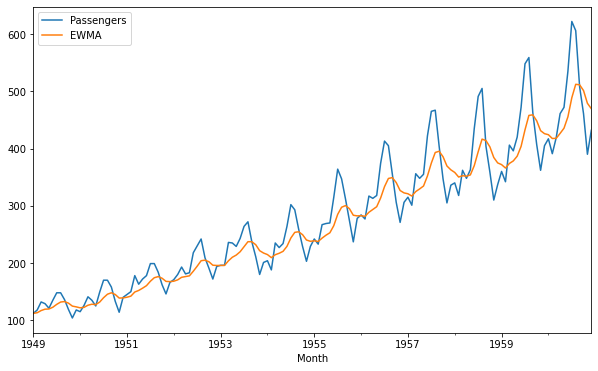

In [28]:
df.plot(figsize = (10, 6))
plt.show()

In [29]:
manual_ewma = []
for x in df['Passengers'].to_numpy():
    if len(manual_ewma) > 0:
        xhat = alpha * x + (1 - alpha) * manual_ewma[-1]
    else:
        xhat = x
    manual_ewma.append(xhat)
df['Manual'] = manual_ewma

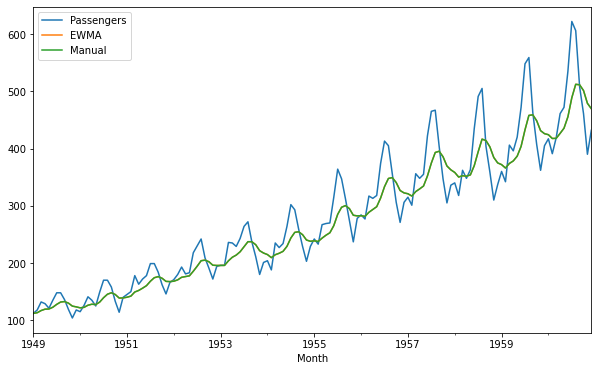

In [32]:
df.plot(figsize = (10, 6))
plt.show()

In [33]:
df.head()

,Passengers,EWMA,Manual
Month,,,
1949-01-01,112,112.0000,112.0000
1949-02-01,118,113.2000,113.2000
1949-03-01,132,116.9600,116.9600
1949-04-01,129,119.3680,119.3680
1949-05-01,121,119.6944,119.6944


In [36]:
df.drop('Manual', axis = 1, inplace = True)

**Lesson# 26:** SES (Simple Exponential Smoothing) theory  
* SES: Non-trending, non-seasonal
* Holt model: Trending, but non-seasonal
* Holt-Winters model: Trend, seasonal

Exponentially-Weighted Moving Average (EWMA) -- also know as Exponential Smoothing

Original equation  
$EWMA: \bar{x}_{t} = {\alpha}{x}_{t} + (1 - {\alpha})\bar{x}_{t-1}, where \ 0 \le {\alpha} \le 1$  
<br>
Modified equation with new notations  
$\widehat{y}_{t} = {\alpha}{y}_{t} + (1 - {\alpha})\widehat{y}_{t-1}, where \ 0 \le {\alpha} \le 1$  
* This equation can be said as: `current prediction = alpha x current value + (1 - alpha) x last prediction`
<br>
* $\widehat{y}_{t}$ is prediction - exponantially smoothed version of y at time t  
* ${y}_{t}$ is a value from our time series at time t  
* ${\alpha}$ is smoothing parameter  
* As time = t, this is not a forecasting equation

**Forecasting Model**  
$\widehat{y}_{t+1|t} = {\alpha}{y}_{t} + (1 - {\alpha})\widehat{y}_{t|t-1}$  
* Symbol ' | ' in ${t+1|t}$: In probability, ' | ' (vertical bar symbol) mean 'given'  
* This equation can be said as: `next prediction = alpha x current value + (1 - alpha) x current prediction`  
* As time = t + 1, this is a forecasting equation - we are predicting with '+ 1' in the 't + 1'

**Component Form**  
* Forecast equation: $\widehat{y}_{t+h|t} = {l}_{t}, h = 1,2,3,...$  
  -- The forecast is constant (same for all values of h)
<br></br>  
* Smoothing equation: ${l}_{t} = {\alpha}{y}_{t} + (1 - {\alpha}){l}_{t-1}$  
  -- ${l}_{t}$ is $\widehat{y}_{t}$ in the $EWMA$ equation  
  -- ${l}_{t}$ is called the 'level'; 'level' can be thought of as the moving average


**Lesson# 27:** SES (Simple Exponential Smoothing) code

In [39]:
# !pip install -U statsmodels

In [42]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

#import warnings
#warnings.filterwarnings('ignore')

In [45]:
ses = SimpleExpSmoothing(df['Passengers'])

In [46]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

* There is no frequency so the output has 'freq = None'  
* We can assign the frequency in the below line of code

In [47]:
df.index.freq = 'MS' # 'MS' is for months

* Link to 'Offset aliases' page for frequency  
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [49]:
# Creating another instance after updating our dataframe 'freq'
# initialization_method = 'legacy-heuristic': It will work just like the old version
ses = SimpleExpSmoothing(df['Passengers'], initialization_method = 'legacy-heuristic')

In [50]:
# 'fit' function with fixed 'alpha'
# optimized = False: It does the same calculation as previously which allows us to compare the output
result = ses.fit(smoothing_level = alpha, optimized = False)

In [51]:
result

In [55]:
result.predict(start = df.index[0], end = df.index[-1])

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    113.200000
1949-04-01    116.960000
1949-05-01    119.368000
                 ...    
1960-08-01    488.767616
1960-09-01    512.214093
1960-10-01    511.371274
1960-11-01    501.297019
1960-12-01    479.037615
Freq: MS, Length: 144, dtype: float64

In [56]:
df['SES'] = result.predict(start = df.index[0], end = df.index[-1])

In [57]:
np.allclose(df['SES'], result.fittedvalues)

True

'True' in the above output mean that the predict function retuens the same value as the fittedvalues atttibute

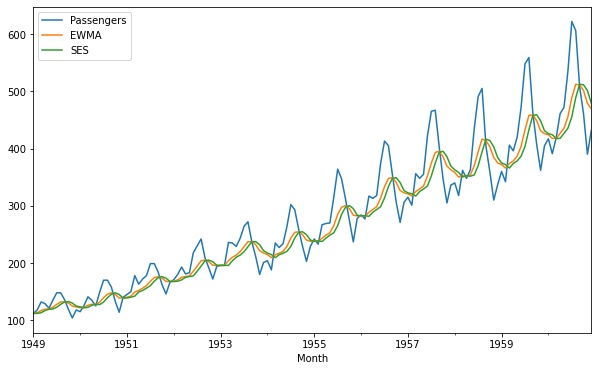

In [59]:
# Plot A
df.plot(figsize = (10, 6))
plt.show()

* Results from SES model is diferent from Pandas, seems to be shifted up by 1  
* We can understand the details about this change from the below code

In [60]:
df.head()

,Passengers,EWMA,SES
Month,,,
1949-01-01,112,112.0000,112.000
1949-02-01,118,113.2000,112.000
1949-03-01,132,116.9600,113.200
1949-04-01,129,119.3680,116.960
1949-05-01,121,119.6944,119.368


In [61]:
# Shifting the 'SES' column back by 1 to see if the rest of the values line up
df['SES-1'] = df['SES'].shift(-1)

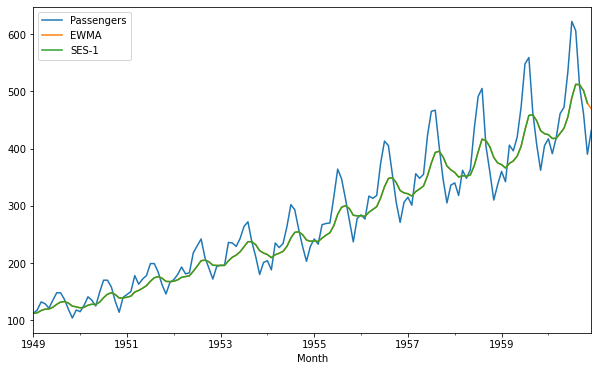

In [64]:
# Plot B
df[['Passengers','EWMA','SES-1']].plot(figsize = (10, 6))
plt.show()

*From the Forecast equation and the Smoothing equation:*  
-- Forecasting model is defined slightly differently from the traditional EWMA  
-- SES model should be lagging behind by 1 time stamp  
-- So our 'Plot A' is correct

Treating this more like a ML problem:  
-- split out dataset in train & test  
-- and do a forecast

In [65]:
N_test = 12
train = df.iloc[:-N_test]
test = df.iloc[-N_test:]

In [67]:
# recreate a simple exponential smoothing object
# no alpha or no optimized in the fit() function: result will be the best alpha which minimizes the 
# squared error 
ses = SimpleExpSmoothing(train['Passengers'], initialization_method = 'legacy-heuristic')
result = ses.fit()

In [68]:
# boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

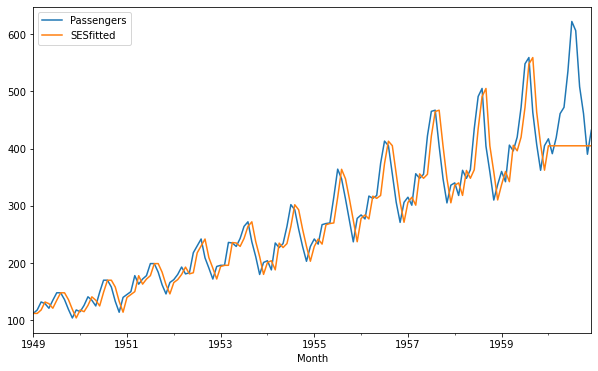

In [69]:
# assigning predictions from our model back to the original dataframe df
df.loc[train_idx, 'SESfitted'] = result.fittedvalues
df.loc[test_idx, 'SESfitted'] = result.forecast(N_test)

df[['Passengers','SESfitted']].plot(figsize = (10, 6))
plt.show()

The forecast (orange line) follows (lags the data) very closely to the data, the alphs must be close to 1

In [70]:
result.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

* The alpha is 0.995, which is very close to 1  
* This means our fitted model is simply doing nearly a naive forecast  
* It simply sopies the last known value in the series

**Lesson# 28:** Holt's Linear Trend model - Theory

**Lesson# 29:** Holt's Linear Trend model - Code